<h1><center>Assignment – Preprocessing Data for scikit-learn</center></h1> 
 
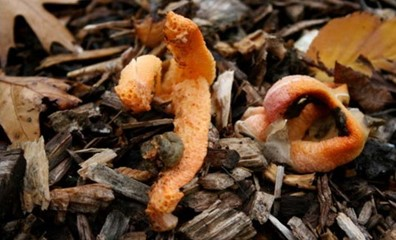
  
Very often, we’re tasked with taking data in one form and transforming it for easier downstream analysis.  In this assignment, you’ll use what you’ve learned in the course to prepare data for predictive analysis in Project 4. 
Mushrooms Dataset.  A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository here: https://archive.ics.uci.edu/ml/datasets/Mushroom.  The fact that this is such a well-known dataset in the data science community has made it a good dataset to use for comparative benchmarking.  For example, if someone was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data, this dataset could be useful.  In Project 4, we’ll use scikit-learn to answer the question, “Which other attribute or attributes are the best predictors of whether a particular mushroom is poisonous or edible?” Your assignment is to  
- First study the dataset and the associated description of the data (i.e. “data dictionary”).  You may need to look around a bit, but it’s there!   
- Create a pandas DataFrame with a subset of the columns in the dataset.  You should include the column 
that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing. 
- Add meaningful names for each column. 
- Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1.  This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics. 
- Perform exploratory data analysis:  show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected. 
- Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous. 
 
Your deliverable is a Jupyter Notebook that performs these transformation and exploratory data analysis tasks. 
If you are working in a group, you also have the option of replacing the mushroom dataset in the assignment with a different data set that your group members might find more interesting. 

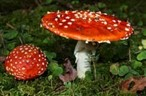
  
You should post the Jupyter Notebook (.ipynb) file in your GitHub repository, and provide the appropriate URL to your GitHub repository in your assignment link.  You should also have the original data file accessible through your code—for example, read directly from the UCI repository or stored in a GitHub repository. 


### Importing libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
import numpy as n

### Load mushroom dataset used in Assignment 12

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', 
                            sep=',', 
                            header=None, 
                            usecols=[0,5,21], 
                            names=["Edible/Poisonous","Odor","Population"])

In [3]:
df.head(20)

,Edible/Poisonous,Odor,Population
0,p,p,s
1,e,a,n
2,e,l,n
3,p,p,s
4,e,n,a
5,e,a,n
6,e,a,n
7,e,l,s
8,p,p,v
9,e,a,s


### Replace letter values from data with numeric values.

In [4]:
df['Edible/Poisonous'].replace({'e':0, 'p': 1}, inplace=True)
df['Odor'].replace({'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}, inplace=True)
df['Population'].replace({'a':0, 'c':1, 'n':2, 's':3, 'v':4, 'y':5}, inplace=True)

In [5]:
df

,Edible/Poisonous,Odor,Population
0,1,7,3
1,0,0,2
2,0,1,2
3,1,7,3
4,0,6,0
...,...,...,...
8119,0,6,1
8120,0,6,4
8121,0,6,1
8122,1,3,4


### Use the get_dummies() method to convert each of the two predictor columns into a set of columns. 
### The following shows the "Odor" column and the one after the "Population" column.

In [6]:
m_dummy = pd.get_dummies(df['Odor'])
m_dummy

,0,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,1,0,0
8120,0,0,0,0,0,0,1,0,0
8121,0,0,0,0,0,0,1,0,0
8122,0,0,0,1,0,0,0,0,0


In [7]:
p_dummy = pd.get_dummies(df['Population'])
p_dummy

,0,1,2,3,4,5
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
8119,0,1,0,0,0,0
8120,0,0,0,0,1,0
8121,0,1,0,0,0,0
8122,0,0,0,0,1,0


###  Conbine the columns

In [8]:
df_new = pd.concat([df, m_dummy, p_dummy], axis = 1)
df_new

,Edible/Poisonous,Odor,Population,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5
0,1,7,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,7,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,6,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,6,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8120,0,6,4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8121,0,6,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8122,1,3,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


### Set values for X and Y

In [10]:
X = m_dummy.iloc[:, :-1].values
y = p_dummy.iloc[:, 1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1)

### Implement linear regression for prediction and to create true/predicted response values.

In [17]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)
true = [1, 0]
pred = [1, 0]

print(metrics.mean_absolute_error(true, pred))
print(metrics.mean_squared_error(true, pred))
print(metrics.mean_squared_error(true, pred))

0.0
0.0
0.0


### Calculate the margin of error

In [18]:
print(metrics.mean_squared_error(Y_test, Y_pred))

0.04161325813204338


### Remove individual variables to see which is most important for determining edibility, odor or population. Here I started with "odor" and then "population".

In [20]:
X = m_dummy.iloc[:, 5:6].values
y = p_dummy.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print(metrics.mean_squared_error(y_test, y_pred))

0.04427126327288063


In [21]:
X = m_dummy.iloc[:, 3:4].values
y = p_dummy.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
Y_pred = linreg.predict(X_test)

print(metrics.mean_squared_error(y_test, y_pred))

0.04427126327288063


### Based on these results, both the odor and population would be useful to predict the edibility and poisonous of mushrooms because they are both similar in their margin of error.